In [9]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("creditcard.csv")
df

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
5,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
6,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
7,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
8,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
9,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0


In [11]:
df.head()

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [12]:
df.tail()

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
657,497,-0.417836,0.981103,1.135820,-0.172593,0.396675,-0.002842,0.519780,0.248763,-0.593497,...,-0.205580,-0.547474,-0.020486,-0.368187,-0.227053,0.105281,0.253800,0.081276,8.83,0
658,498,-0.753769,1.098287,1.835453,0.614571,-0.317859,-0.101055,0.039454,-0.656824,-0.048761,...,1.101142,0.686059,0.005954,0.361744,-0.457852,-0.352576,0.094602,0.170480,5.00,0
659,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0
660,499,1.355790,-1.122921,1.191187,-0.576548,-1.708750,0.274721,-1.640785,0.295838,0.618649,...,0.302035,0.920013,-0.210219,-0.435499,0.450803,0.068454,0.062214,0.022191,22.83,0
661,499,-0.860626,-0.109137,2.112474,-1.400567,0.180269,1.329656,0.431001,0.317761,0.593762,...,-0.197635,-0.436535,-0.194840,-1.236873,0.218668,0.902383,-0.210195,-0.190458,92.82,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 31 columns):
0               662 non-null int64
-1.359807134    662 non-null float64
-0.072781173    662 non-null float64
2.536346738     662 non-null float64
1.378155224     662 non-null float64
-0.33832077     662 non-null float64
0.462387778     662 non-null float64
0.239598554     662 non-null float64
0.098697901     662 non-null float64
0.36378697      662 non-null float64
0.090794172     662 non-null float64
-0.551599533    662 non-null float64
-0.617800856    662 non-null float64
-0.991389847    662 non-null float64
-0.311169354    662 non-null float64
1.468176972     662 non-null float64
-0.470400525    662 non-null float64
0.207971242     662 non-null float64
0.02579058      662 non-null float64
0.40399296      662 non-null float64
0.251412098     662 non-null float64
-0.018306778    662 non-null float64
0.277837576     662 non-null float64
-0.11047391     662 non-null float64
0.0669280

In [14]:
df.describe()

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,241.087613,-0.171685,0.203339,0.865507,0.312177,0.005481,0.190657,0.119999,-0.058113,-0.022026,...,0.011604,-0.101897,-0.039030,-0.001231,0.118344,0.024121,0.026115,-0.015513,70.219940,0.039275
std,146.878674,1.318935,1.195939,1.016148,1.268311,1.131878,1.249667,0.861213,0.829037,0.898050,...,0.611495,0.609526,0.369470,0.628766,0.426891,0.468805,0.308407,0.291266,206.580833,0.194395
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.250000,-0.898800,-0.174281,0.311406,-0.436612,-0.553732,-0.614206,-0.325427,-0.158631,-0.517332,...,-0.219976,-0.528998,-0.172891,-0.384998,-0.160561,-0.313283,-0.045096,-0.015094,5.975000,0.000000
50%,241.500000,-0.373362,0.280917,0.894895,0.444094,-0.106432,-0.072322,0.116329,0.043828,-0.074044,...,-0.070155,-0.072565,-0.045317,0.093423,0.145592,-0.015632,0.022920,0.023137,17.240000,0.000000
75%,366.000000,1.109776,0.877703,1.505101,1.140394,0.469752,0.491334,0.567795,0.263080,0.415549,...,0.102520,0.312472,0.073996,0.429869,0.440540,0.264540,0.114210,0.088143,57.147500,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [15]:
df.corr

<bound method DataFrame.corr of        0  -1.359807134  -0.072781173  2.536346738  1.378155224  -0.33832077  \
0      0      1.191857      0.266151     0.166480     0.448154     0.060018   
1      1     -1.358354     -1.340163     1.773209     0.379780    -0.503198   
2      1     -0.966272     -0.185226     1.792993    -0.863291    -0.010309   
3      2     -1.158233      0.877737     1.548718     0.403034    -0.407193   
4      2     -0.425966      0.960523     1.141109    -0.168252     0.420987   
5      4      1.229658      0.141004     0.045371     1.202613     0.191881   
6      7     -0.644269      1.417964     1.074380    -0.492199     0.948934   
7      7     -0.894286      0.286157    -0.113192    -0.271526     2.669599   
8      9     -0.338262      1.119593     1.044367    -0.222187     0.499361   
9     10      1.449044     -1.176339     0.913860    -1.375667    -1.971383   
10    10      0.384978      0.616109    -0.874300    -0.094019     2.924584   
11    10      1.2499

In [16]:
df.isnull().sum()

0               0
-1.359807134    0
-0.072781173    0
2.536346738     0
1.378155224     0
-0.33832077     0
0.462387778     0
0.239598554     0
0.098697901     0
0.36378697      0
0.090794172     0
-0.551599533    0
-0.617800856    0
-0.991389847    0
-0.311169354    0
1.468176972     0
-0.470400525    0
0.207971242     0
0.02579058      0
0.40399296      0
0.251412098     0
-0.018306778    0
0.277837576     0
-0.11047391     0
0.066928075     0
0.128539358     0
-0.189114844    0
0.133558377     0
-0.021053053    0
149.62          0
0.1             0
dtype: int64

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv("creditcard.csv")
df

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
5,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
6,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
7,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
8,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
9,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0


In [19]:
df.shape

(662, 31)

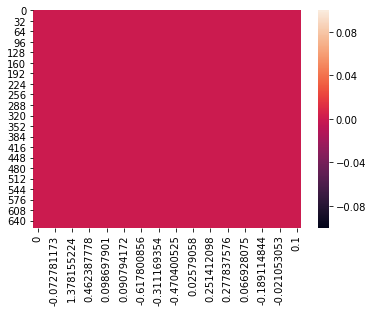

In [20]:
sns.heatmap(df.isnull())

In [ ]:
sns.pairplot(df)

In [22]:
X = df.iloc[:, df.columns != 'Class'].values
y = df.iloc[:, df.columns == 'Class'].values

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=.03,random_state=0)

In [30]:
train_X.shape

(642, 31)

In [31]:
train_y.shape

(642,)

In [32]:
test_X.shape

(20, 31)

In [33]:
test_y.shape

(20,)

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
classifier = LogisticRegression()

In [37]:
classifier.fit(train_X,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
classifier.score(train_X,train_y)

1.0

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)

In [43]:
random_forest.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_pred = random_forest.predict(test_X)

In [49]:
from sklearn.metrics import confusion_matrix

In [54]:
con=confusion_matrix(test_y,y_pred)

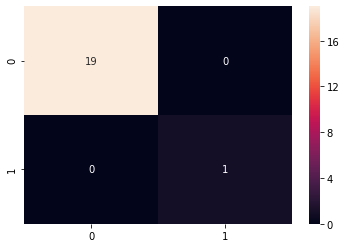

In [56]:
sns.heatmap(con,annot=True)

In [61]:
rf=RandomForestClassifier()
rf.fit(train_X,train_y)
predrf=rf.predict(test_X)
print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

1.0
[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [77]:
rbf_rf_conf_matrix = confusion_matrix(test_y, predrf)
rbf_rf_acc_score = accuracy_score(test_y, predrf)
print(rbf_rf_conf_matrix)
print(rbf_rf_acc_score*100)

[[19  0]
 [ 0  1]]
100.0


In [72]:
gnb=GaussianNB()
gnb.fit(train_X,train_y)
predgnb=gnb.predict(test_X)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

1.0
[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [78]:
nb_conf_matrix = confusion_matrix(test_y, predgnb)
nb_acc_score = accuracy_score(test_y, predgnb)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[19  0]
 [ 0  1]]
100.0


In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
from sklearn.svm import SVC

In [88]:
from sklearn import metrics

In [89]:
svc=SVC(probability=True, kernel='linear')

In [94]:
abc=AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)

In [95]:
print("Accuracy:",metrics.accuracy_score(test_y,y_pred))

Accuracy: 1.0


In [68]:
dt=DecisionTreeClassifier()

In [69]:
dt.fit(train_X,train_y)
dt.score(train_X,train_y)
preddt=dt.predict(test_X)
print(accuracy_score(test_y,preddt))
print(confusion_matrix(test_y,preddt))
print(classification_report(test_y,preddt))

1.0
[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn=KNeighborsClassifier()
knn.fit(train_X,train_y)
preddt=knn.predict(test_X)
print(accuracy_score(test_y,preddt))
print(confusion_matrix(test_y,preddt))
print(classification_report(test_y,preddt))

0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



In [117]:
for k in range(25):
    k_value=k+1
    knn=KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(train_X,train_y)
    y_pred=knn.predict(test_X)
    print("accuracy score is ",accuracy_score(test_y,y_pred),'at k-value',k_value)

accuracy score is  0.95 at k-value 1
accuracy score is  0.95 at k-value 2
accuracy score is  0.95 at k-value 3
accuracy score is  0.95 at k-value 4
accuracy score is  0.95 at k-value 5
accuracy score is  0.95 at k-value 6
accuracy score is  0.95 at k-value 7
accuracy score is  0.95 at k-value 8
accuracy score is  0.95 at k-value 9
accuracy score is  0.95 at k-value 10
accuracy score is  0.95 at k-value 11
accuracy score is  0.95 at k-value 12
accuracy score is  0.95 at k-value 13
accuracy score is  0.95 at k-value 14
accuracy score is  0.95 at k-value 15
accuracy score is  0.95 at k-value 16
accuracy score is  0.95 at k-value 17
accuracy score is  0.95 at k-value 18
accuracy score is  0.95 at k-value 19
accuracy score is  0.95 at k-value 20
accuracy score is  0.95 at k-value 21
accuracy score is  0.95 at k-value 22
accuracy score is  0.95 at k-value 23
accuracy score is  0.95 at k-value 24
accuracy score is  0.95 at k-value 25


In [ ]:
lg_conf_matrix = confusion_matrix(y_test, lg_predict)
lg_acc_score = accuracy_score(y_test, lg_predict)
print(lg_conf_matrix)
print(lg_acc_score*100)

In [ ]:
lg_conf_matrix = confusion_matrix(y_test, lg_predict)
lg_acc_score = accuracy_score(y_test, lg_predict)
print(lg_conf_matrix)
print(lg_acc_score*100)